In [1]:
from mmseg.apis.inference import inference_segmentor
from mmseg.apis import init_segmentor
device = 'cuda'
from mmcv import Config
sys.path.insert(1, '../segViT/')
from dataset_parser import EddyDatasetREGISTER
from eddy_seg_vit import predict_random_img

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


cuda


In [2]:
cp = '/home/emir/Desktop/dev/myResearch/src/ViT_Segmentation/segmenter_vit/output/iter_160000.pth'
cfg_pth = "/home/emir/Desktop/dev/myResearch/src/ViT_Segmentation/segmenter_vit/configs/segmenter/segmenter_vit-b_mask_8x1_512x512_160k_eddy_data.py"

In [3]:
cfg = Config.fromfile(cfg_pth)
model = init_segmentor(config=cfg, checkpoint=cp, device=device)
model.CLASSES = EddyDatasetREGISTER.CLASSES
model.PALETTE = EddyDatasetREGISTER.PALETTE

load checkpoint from local path: /home/emir/Desktop/dev/myResearch/src/ViT_Segmentation/segmenter_vit/output/iter_160000.pth


Label Dir /home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/train_label/4_53_51_201.png
img dir /home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/train_data_mat/4_53_51_201.mat


/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


seg logit shape torch.Size([256, 256])
results shape (256, 256)


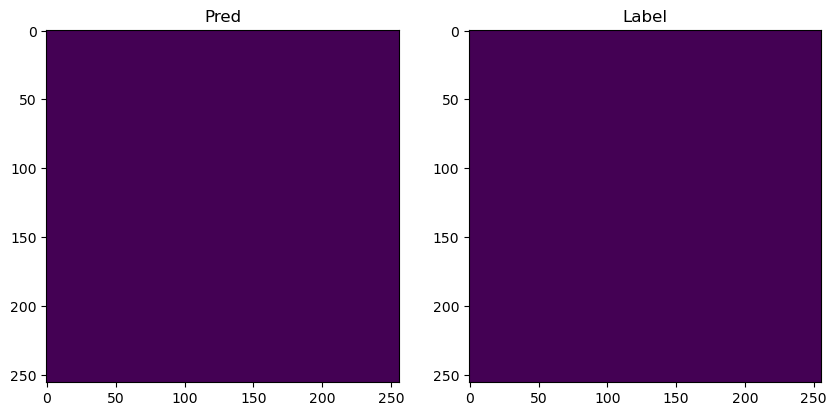

In [4]:
data_dir = "/home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/train_data_mat/"
label_dir = "/home/emir/Desktop/dev/myResearch/dataset/dataset_eddy/train_label/"
predict_random_img(model, data_dir, label_dir)